A.S. Lundervold, 14.01.19.

# Introduksjon

Som diskutert i introduksjonen til Lab 3 er *virtual screening* og analyse av molekylers *affinitet* til et target, basert på deres molekylære beskrivelser (fingerprint), en sentral del av **drug discovery**. 

Dette kalles ofte **QSAR**: Quantitative Structure-Activity Relationship.

Vi ser (kort) på et eksempel.


# Setup

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from pathlib import Path

# Data

Vi bruker et (utvalg av) et datasett fra en konkurranse på Kaggle organisert av Merck i 2013. (Om du er interessert kan du laste ned hele datasettet fra https://www.kaggle.com/c/MerckActivity.) 

> Help enable the development of safe, effective medicines.

> When developing new medicines it is important to identify molecules that are highly active toward their intended targets but not toward other targets that might cause side effects. The objective of this competition is to identify the best statistical techniques for predicting biological activities of different molecules, both on- and off-target, given numerical descriptors generated from their chemical structures.

> The challenge is based on 15 molecular activity data sets, each for a biologically relevant target. Each row corresponds to a molecule and contains descriptors derived from that molecule's chemical structure.

Vårt datasett består av et av de femten settene fra MerckActivity. 

> Merk at dette er et **regresjonsproblem**: vi ønsker ikke å predikere en *klasse*, slik vi har gjort tidligere, men en **kontinuerlig verdi**. Vi må derfor forholde oss til litt andre modeller, og spesielt også andre teknikker for å evaluere våre resultater. 

# Last inn og se på data

Vi har plassert datasettet i katalogen `../data/drug`:

In [2]:
DATA = Path('../data/drug')

In [3]:
act = pd.read_csv(DATA/"ACT15_competition_training.csv")

In [4]:
act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5059 entries, 0 to 5058
Columns: 5554 entries, MOLECULE to D_11030
dtypes: float64(1), int64(5552), object(1)
memory usage: 214.4+ MB


Hver rad tilhører ett molekyl, og består av 5877 features (descriptors) av molekylet samt dets aktivitet med hensyn på target. 

In [5]:
act.head()

,MOLECULE,Act,D_6,D_37,D_38,D_39,D_40,D_43,D_44,D_45,...,D_10868,D_10871,D_10882,D_10885,D_10951,D_10963,D_10995,D_11012,D_11027,D_11030
0,ACT15_M_1,8.6182,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ACT15_M_2,9.8521,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ACT15_M_3,8.3264,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ACT15_M_5,8.2581,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ACT15_M_6,7.3552,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Som vanlig lager vi en X (features / fingerprints) og y (det vi ønsker å predikere):

In [6]:
X = act.drop(["MOLECULE", "Act"], axis=1)
y = act['Act']

## Plots

Hva er fordelingen til aktivitetsmålene?

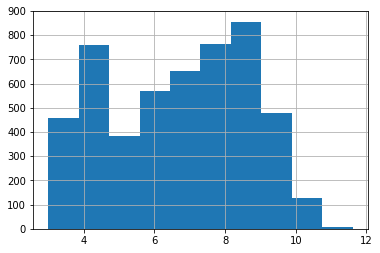

In [7]:
y.hist()
plt.show()

Det er interessant å se på fordelingen av verdiene i de ulike søylene. Siden det er såpass mange velger vi oss ut et tilfeldig utvalg for plotting:

In [8]:
import random

/home/alex/anaconda3/envs/elmed219/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3267: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


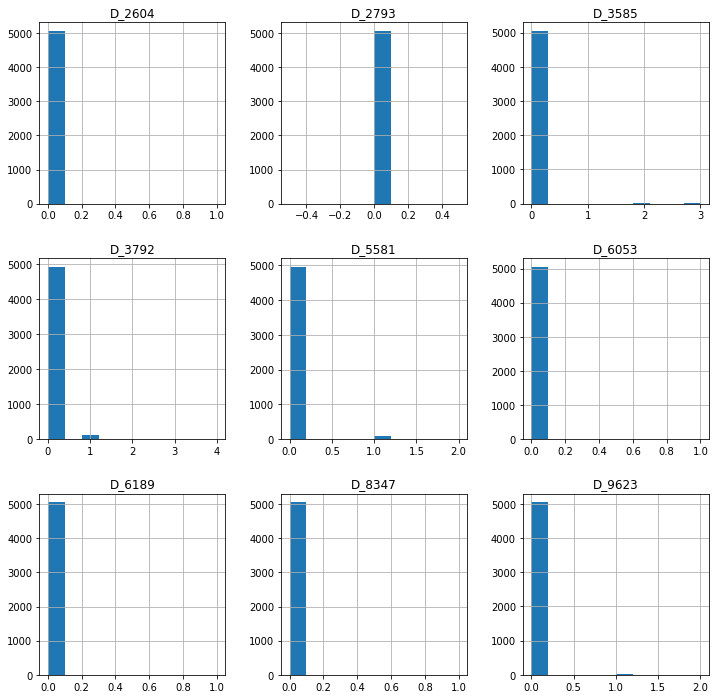

In [9]:
# Hver gang denne cellen kjøres plukkes det ut 9 features tilfeldig.
# Du må gjerne forsøke flere ganger

features = random.choices(X.columns, k=9)
fig, ax = plt.subplots(figsize=(12,12))
X[features].hist(ax=ax)
plt.show()

Det kan se ut som at deskriptorene stort sett er 0 for alle molekyler, med relativt få unntak. Dette er normalt for fingerprinting.  

# Train-test-split

> NB: Erfaringen til deltakerne i Kaggle-konkurransen var at hvordan en splittet ut sitt valideringssett hadde stor innflytelse på hvor godt ytelsen på dette samsvarte med ytelsen på test-settet til Kaggle. 

Vi velger her å overse dette og bruke en enkel, random split av data, der 25% brukes som test-data:

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Modell

Som vanlig bruker vi en random forest, denne gangen for regresjon:

In [12]:
from sklearn.ensemble import RandomForestRegressor

In [13]:
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42)

In [14]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

Vår modell er trent og vi kan finne dens prediksjoner på testdata:

In [15]:
y_pred = rf.predict(X_test)

# Evaluering

Her er de første 10 fasitsvar og tilhørende prediksjoner:

In [16]:
list(zip(y_test, y_pred))[:10]

[(9.1233, 8.177232666666665),
 (7.4935, 7.74530674047619),
 (7.4672, 7.968553733333335),
 (7.3552, 7.837343333333329),
 (7.6562, 8.268241000000003),
 (9.7941, 9.371795500000001),
 (10.2992, 9.196965499999989),
 (10.2821, 9.079704000000008),
 (9.5669, 9.042292000000005),
 (3.9993, 3.5698640000000035)]

Med `.score` på en random forest regressor beregnes såkalt $R^2$ score. Se https://en.wikipedia.org/wiki/Coefficient_of_determination. Den beste mulige scoren er 1.0.

In [17]:
rf.score(X_test, y_test)

0.8053503755413057

Vi kan velge andre mål for å evaluere regressoren. Her er to mye brukte mål i regresjon:

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [19]:
mean_absolute_error(y_test, y_pred)

0.656208833354665

In [20]:
mean_squared_error(y_test, y_pred)

0.806114272181625

## Plots

Det er også nyttig å plotte prediksjonene versus de korrekte verdiene i et scatter plot. 

Her er en funksjon for å oppnå dette, som også legger til en regresjonslinje:

In [21]:
import seaborn as sns
from sklearn.metrics import r2_score
def evaluate(y_test, y_pred):
    print(f"R2 score er: {r2_score(y_test, y_pred).round(2)}")
    print(f"Mean absolute error er: {mean_absolute_error(y_test, y_pred).round(2)}")
    print(f"Mean squared error er: {mean_squared_error(y_test, y_pred).round(2)}")
    
    plt.figure(figsize=(12,8))
    sns.regplot(x=y_test, y=y_pred, line_kws={"color":"g","lw":3}, ci=0)
    plt.show()  

R2 score er: 0.81
Mean absolute error er: 0.66
Mean squared error er: 0.81


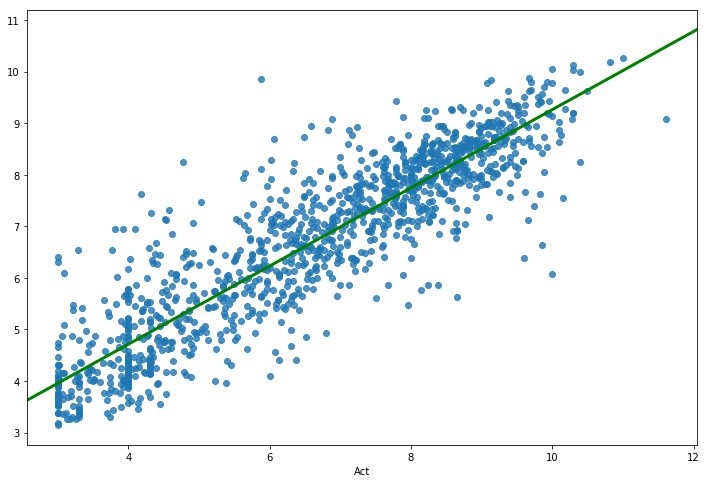

In [22]:
evaluate(y_test, y_pred)

Vi ser visuelt at modellen har plukket opp noen sammenhenger og er i stand til å stort sett predikere rimelige verdier for `Activity`.

# Fine-tune

Som diskutert tidligere kan vi fin-tune modeller ved å søke etter gode hyperparametre. La oss forsøke.

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42)

In [25]:
param_grid = {
    'max_depth': [7, None],
    'min_samples_leaf': [1, 2],
    'n_estimators': [100, 500]
}

In [26]:
gs = GridSearchCV(rf, param_grid=param_grid, cv=3, n_jobs=-1)

In [27]:
# OBS: Ikke kjør koden i denne cellen med mindre du har god tid. 
# Se nedenfor for en snarvei.

# gs.fit(X_train, y_train)

# Her er den beste modellen vi fant i søket:
# model = gs.best_estimator_

**OBS:** Kjør følgende kode istedenfor cellene over for å spare tid. Her laster vi inn den beste modellen funnet via søket.

In [30]:
import pickle
model = pickle.load(open('grid_search-drug-model', 'rb'))

Vi ser at parametrene til denne er litt forskjellige fra de til modellen vi brukte tidligere:

In [31]:
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

Hvor god er denne modellen?

R2 score er: 0.81
Mean absolute error er: 0.65
Mean squared error er: 0.79


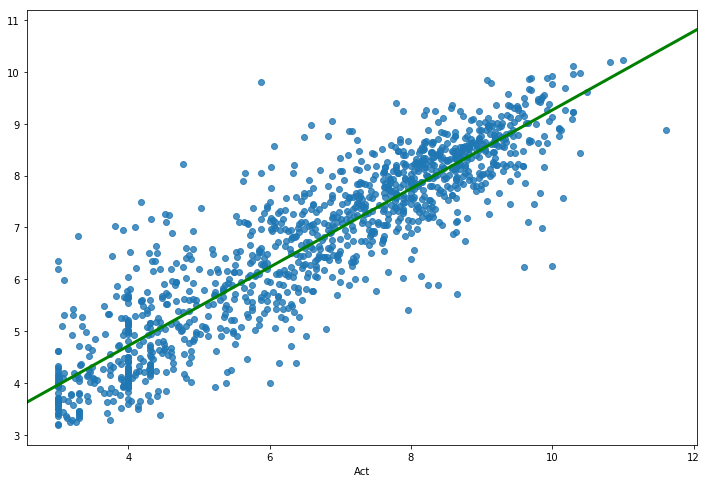

In [32]:
y_pred = model.predict(X_test)

evaluate(y_test, y_pred)

In [33]:
model.score(X_test, y_test)

0.808251283482641

Modellen er altså ørlitte grann bedre enn vår første. 

# Feature importance

In [34]:
importances = model.feature_importances_

# Finn indeks til features med høyest importance
# sortert fra størst til minst: 
indices = np.argsort(importances)[::-1]

for f in range(10): 
    print(f'{X.columns[indices[f]]}: {np.round(importances[indices[f]],2)}')

D_7656: 0.22
D_5790: 0.13
D_2700: 0.03
D_1214: 0.02
D_5488: 0.02
D_1110: 0.01
D_2698: 0.01
D_2699: 0.01
D_2652: 0.01
D_2238: 0.01


# Permutation importance

På grunn av det store antall features vil dette ta *veldig* lang tid.. Se output i bildet nedenfor. 

In [102]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, random_state=42).fit(X_test, y_test)

In [103]:
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.1579 ± 0.0297,D_7656
0.1563 ± 0.0113,D_5790
0.0765 ± 0.0058,D_1214
0.0273 ± 0.0024,D_2700
0.0146 ± 0.0017,D_1110
0.0094 ± 0.0011,D_2238
0.0070 ± 0.0012,D_2652
0.0059 ± 0.0020,D_296
0.0058 ± 0.0024,D_2474
0.0055 ± 0.0029,D_2698


Her er resultatet:

<img width=35% src="assets/perm_importance_drug_gridsearch.png">

Det er ikke vanskelig å tenke seg at denne informasjonen er veldig verdifull, gitt at en har en god modell og en vet hva "D_7656" og "D_5790" sier om den kjemiske forbindelsen.